# Note

Before running this script, run ``flow.ipynb`` to generate the following data

* ``flow_mp.npz``
* ``flow_km.npz``
* ``flow_wa.npz``

The script re-generates the same plots as ``flow.ipynb`` did, but places these three data side-by-side next to each other. This is used for the poster and slides.

In [21]:
import numpy
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib import cm
import texplot

latex = True
plot_ext = '.pdf'

In [34]:
# ====
# plot
# ====

def plot(ax, data, title, sci_tick=False, ylim=None, ylabel=False, yticks=None):

    # Extract data
    x = data['x']
    eig = data['eig']
    rhos_pred = data['rhos_pred']
    rho_last = data['rho_last']
    save_filename = data['save_filename']

    if ylim is None:
        ylim = data['ylim']
    
    sizes = list(eig.size * 2**numpy.arange(0, 6))
    sizes = [int(size) for size in sizes]

    # # Main part: decompression
    # rhos_pred, _ = ff.decompress(sizes, x=x, method='newton', max_iter=500,
    #                              step_size=0.1, tolerance=1e-4, plot=False,
    #                              latex=False, save=False,
    #                              plot_diagnostics=True)

    lw = 1.5
    
    num_plots = len(sizes)
    cmap = plt.get_cmap('gist_heat')
    colors = [cmap(i/(num_plots + 2)) for i in range(num_plots + 1)][1:]
 
    # ax[0].plot(x, rhos_pred[0], linewidth=lw, color='black', label='Density Estimate')
    # ax[0].hist(eig, bins=25, density=True, color='lightsteelblue', alpha=0.8,
    #            edgecolor='none', label='Empirical Spectrum', rasterized=True)
    # ax[0].set_title('(a) Initial Empirical Density ($n=1$K)')

    for i in range(0, len(sizes)):
        ax.plot(x, rhos_pred[i], linewidth=lw, color=colors[i],
                label=f'$n = {{{sizes[i]//1000}}}$K')
        
    ax.set_title(title)

    # ff2 = family(sizes[-1])
    # rho_last = ff2.density(x, plot=False)

    # ax[2].plot(x, rho_last, linewidth=lw, color='black',
    #            label=r'Benchmark Density (Exact)')
    # ax[2].plot(x, rhos_pred[-1], linewidth=lw, color=colors[-1],
    #            label='Free Decompression Solution')
    # ax[2].set_title(r'(c) Final Empirical Density ($n=32$K)')

    if ylabel:
        ax.set_ylabel(r'Density $\rho(\lambda)$')

    if yticks is not None:
        ax.set_yticks(yticks)

    # for i in range(1, len(ax)):
    # ax.tick_params(left=False, labelleft=False)

    # for i in range(len(ax)):
    ax.legend(fontsize='x-small', facecolor='none')
    ax.set_xlabel(r'$\lambda$')
    if ylim is not None:
        ax.set_ylim(ylim)
    ax.set_xlim([x[0], x[-1]])

    if sci_tick:
        sf = mticker.ScalarFormatter(useMathText=True)
        sf.set_scientific(True)
        sf.set_powerlimits((-3, -3))   # force 10^{-3}
        ax.yaxis.set_major_formatter(sf)

Plot saved to "/home/eecs/sameli/freealg/notebooks/flows.pdf".


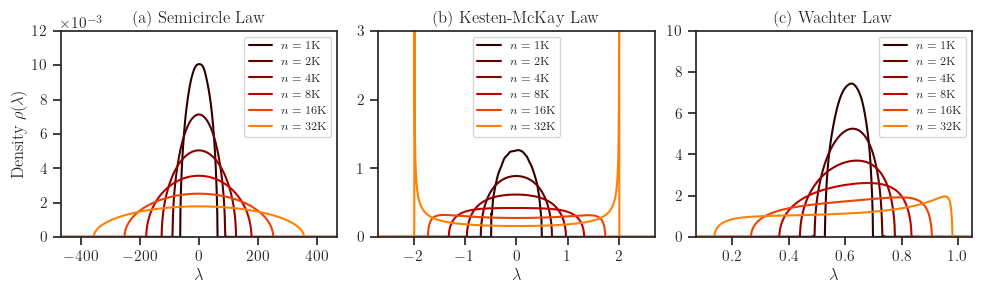

In [50]:
filenames = ['flow_wg', 'flow_km', 'flow_wa']

with texplot.theme(use_latex=latex):
    
    fig, ax = plt.subplots(figsize=(10, 3.1), ncols=len(filenames), sharey=False)

    # mpl.rcParams.update({
    #     "text.usetex": True,                 # force LaTeX
    #     "font.family": "serif",
    #     "font.serif": ["Computer Modern Roman"],
    #     "text.latex.preamble": r"\usepackage{amsmath}",  # optional
    # })
    
    for i in range(len(filenames)):
        data = numpy.load(filenames[i] + '.npz')
        save_filename = data['save_filename']

        sci_tick = False
        ylim = None
        ylabel = False
        yticks = None
    
        if save_filename == 'flow_wg':
            title = r'Semicircle Law'
            sci_tick = True
            ylim = [0, 1.2e-2]
            ylabel = True
            
        elif save_filename == 'flow_km':
            title = r'Kesten-McKay Law'
            yticks = [0, 1, 2, 3]
            
        elif save_filename == 'flow_wa':
            title = 'Wachter Law'
            ylim = [0, 10]
            
        elif save_filename == 'flow_mp':
            title = 'Marchenko-Pastur Law'
        elif save_filename == 'flow_mx':
            title = 'Meixner Law'
        else:
            raise ValueError('name invalid.')

        if i == 0:
            title = r'(a) ' + title
        elif i == 1:
            title = r'(b) ' + title
        elif i == 2:
            title = r'(c) ' + title
        elif i == 4:
            title = r'(d) ' + title
        else:
            raise ValuieError
        
        plot(ax[i], data, title, sci_tick, ylim, ylabel, yticks)
    
    plt.tight_layout(w_pad=0.75)
    
    texplot.show_or_save_plot(plt, default_filename='flows' + plot_ext,
                              transparent_background=True, dpi=200,
                              show_and_save=True, verbose=True)